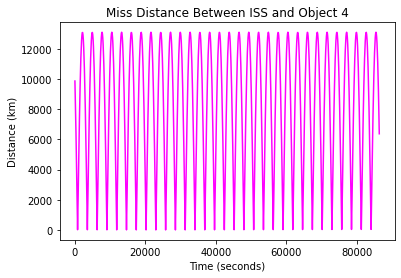

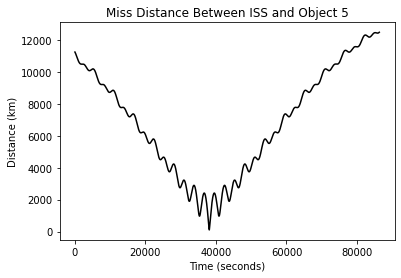

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


MU = 398600
# computing radius using 2nd order RK4 method

def mag(vec):
  return np.sqrt(np.dot(vec, vec))

# Lord forgive me for what I am to code

# Fehlberg coefficients
a = [0, 1/4, 3/8, 12/13, 1, 1/2]

b = [[0, 0, 0, 0, 0],
     [1/4, 0, 0, 0, 0],
     [3/32, 9/32, 0, 0, 0],
     [1932/2197, -7200/2197, 7296/2197, 0, 0],
     [439/216, -8, 3680/513, -845/4104, 0], [-8/27, 2, -3544/2565, 1859/4104, -11/40]]

c_star = [25/216, 0, 1408/2565, 2197/4104, -1/5, 0]

c = [16/135, 0, 6656/12825, 28561/56430, -9/50, 2/55]

# definitions of system of 1st order ODEs (2nd0 EQ of Motion split)

def f(state):
  r = [state[0][0], state[1][0], state[2][0]]
  r_mag = mag(r)
  return np.array([[state[3][0]],
                   [state[4][0]],
                   [state[5][0]],
                   [-MU/r_mag**3 * state[0][0]],
                   [-MU/r_mag**3 * state[1][0]],
                   [-MU/r_mag**3 * state[2][0]]])


# definition of f derivatives

def f_1(state):
  return f(state)

def f_2(state, h):
  state_inner = state + h * b[1][0] * f_1(state)
  return f(state_inner)

def f_3(state, h):
  state_inner = state + h * (b[2][0] * f_1(state) + b[2][1] * f_2(state, h))
  return f(state_inner)

def f_4(state, h):
  state_inner = state + h * (b[3][0] * f_1(state) + b[3][1] * f_2(state, h) + b[3][2] * f_3(state, h))
  return f(state_inner)

def f_5(state, h):
  state_inner = state + h * (b[4][0] * f_1(state) + b[4][1] * f_2(state, h) + b[4][2] * f_3(state, h) + b[4][3] * f_4(state, h))
  return f(state_inner)

def f_6(state, h):
  state_inner = state + h * (b[5][0] * f_1(state) + b[5][1] * f_2(state, h) + b[5][2] * f_3(state, h) + b[5][3] * f_4(state, h) + b[5][4] * f_5(state, h))
  return f(state_inner)

# update functions (for time and state)

def update_time(t, h):
  return t + h

def update_state(state, h):
  f_tot = c[0] * f_1(state) + c[1] * f_2(state, h) + c[2] * f_3(state, h) + c[3] * f_4(state, h) + c[4] * f_5(state, h) + c[5] * f_6(state, h)
  return state + h * f_tot

# finding delta r

def delta_r(state1, state2):
  r1 = np.array([state1[0][0], state1[1][0], state1[2][0]])
  r2 = np.array([state2[0][0], state2[1][0], state2[2][0]])

  return mag(r2 - r1)


# step size rule

def step_size_rule(delta_r):
  num = min(0.01 * (1.01)**(delta_r/10 - 1), 100)
  return max(num, 0.01)

### INITIAL STATES ###

iss_init = np.array([[-1845.417850814],
            [-6092.172005845],
            [2328.337863604],
            [4.281378614],
            [-3.361370008],
            [-5.401755451]])

o1_init = np.array([[-1028.950474343],
                    [4449.537440277],
                    [5950.823336375],
                    [-6.465924315],
                    [1.850855741],
                    [-2.310253829]])

o2_init = np.array([[4477.742707811],
                    [-1000.611267952],
                    [-4986.018302013],
                    [-3.433266954],
                    [5.245259077],
                    [-4.248918972]])

o3_init = np.array([[-4153.267150665],
                    [-1917.869489970],
                    [5240.119199598],
                    [-1.175696919],
                    [7.333777896],
                    [1.483361702]])

o4_init = np.array([[5603.394237177],
                    [-2391.195658262],
                    [-2974.014294217],
                    [-3.089631208],
                    [-7.015455966],
                    [-0.180761981]])

o5_init = np.array([[3606.349446299],
                    [-878.424222497],
                    [-6024.452460982],
                    [2.609985763],
                    [6.964443101],
                    [0.497362247]])

### END INITIAL STATES ###

# function for Runge-Kutta method

def rkf5(init_state1, init_state2, t0, tf, object_num):
  color_wheel = ['', 'red', 'blue', 'green', 'magenta', 'black']

  iss_states = []
  iss = init_state1

  debris_states = []
  debris = init_state2

  ts = []
  t = t0
  conjuncts = False

  drs = []


  while t < tf:
    t_i = t
    ts.append(t_i)

    iss_i = iss
    #iss_states.append(iss_i)

    debris_i = debris
    #debris_states.append(debris_i)


    dr = delta_r(iss_i, debris_i)
    drs.append(dr)


    if dr < 1 and not conjuncts:
      conjuncts = True
      print('This object conjuncts with the ISS at', t_i, 'seconds!')

    h = step_size_rule(dr)

    t = update_time(t_i, h)
    iss = update_state(iss_i, h)
    debris = update_state(debris_i, h)

  plt.plot(ts, drs, color=color_wheel[object_num])
  plt.title('Miss Distance Between ISS and Object '+str(object_num))
  plt.xlabel('Time (seconds)')
  plt.ylabel('Distance (km)')
  plt.show()


rkf5(iss_init, o1_init, 0, 86400, 1)
rkf5(iss_init, o2_init, 0, 86400, 2)
rkf5(iss_init, o3_init, 0, 86400, 3)
rkf5(iss_init, o4_init, 0, 86400, 4)
rkf5(iss_init, o5_init, 0, 86400, 5)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


MU = 398600
# computing radius using 2nd order RK4 method

def mag(vec):
  return np.sqrt(np.dot(vec, vec))

# Lord forgive me for what I am to code

# Fehlberg coefficients
a = [0, 1/4, 3/8, 12/13, 1, 1/2]

b = [[0, 0, 0, 0, 0],
     [1/4, 0, 0, 0, 0],
     [3/32, 9/32, 0, 0, 0],
     [1932/2197, -7200/2197, 7296/2197, 0, 0],
     [439/216, -8, 3680/513, -845/4104, 0], [-8/27, 2, -3544/2565, 1859/4104, -11/40]]

c_star = [25/216, 0, 1408/2565, 2197/4104, -1/5, 0]

c = [16/135, 0, 6656/12825, 28561/56430, -9/50, 2/55]

# definitions of system of 1st order ODEs (2nd0 EQ of Motion split)

def f(state):
  r = [state[0][0], state[1][0], state[2][0]]
  r_mag = mag(r)
  return np.array([[state[3][0]],
                   [state[4][0]],
                   [state[5][0]],
                   [-MU/r_mag**3 * state[0][0]],
                   [-MU/r_mag**3 * state[1][0]],
                   [-MU/r_mag**3 * state[2][0]]])


# definition of f derivatives

def f_1(state):
  return f(state)

def f_2(state, h):
  state_inner = state + h * b[1][0] * f_1(state)
  return f(state_inner)

def f_3(state, h):
  state_inner = state + h * (b[2][0] * f_1(state) + b[2][1] * f_2(state, h))
  return f(state_inner)

def f_4(state, h):
  state_inner = state + h * (b[3][0] * f_1(state) + b[3][1] * f_2(state, h) + b[3][2] * f_3(state, h))
  return f(state_inner)

def f_5(state, h):
  state_inner = state + h * (b[4][0] * f_1(state) + b[4][1] * f_2(state, h) + b[4][2] * f_3(state, h) + b[4][3] * f_4(state, h))
  return f(state_inner)

def f_6(state, h):
  state_inner = state + h * (b[5][0] * f_1(state) + b[5][1] * f_2(state, h) + b[5][2] * f_3(state, h) + b[5][3] * f_4(state, h) + b[5][4] * f_5(state, h))
  return f(state_inner)

# update functions (for time and state)

def update_time(t, h):
  return t + h

def update_state(state, h):
  f_tot = c[0] * f_1(state) + c[1] * f_2(state, h) + c[2] * f_3(state, h) + c[3] * f_4(state, h) + c[4] * f_5(state, h) + c[5] * f_6(state, h)
  return state + h * f_tot

# finding delta r

def delta_r(state1, state2):
  r1 = np.array([state1[0][0], state1[1][0], state1[2][0]])
  r2 = np.array([state2[0][0], state2[1][0], state2[2][0]])

  return mag(r2 - r1)


# step size rule

def step_size_rule(delta_r):
  num = min(0.01 * (1.01)**(delta_r/10 - 1), 100)
  return 10

### INITIAL STATES ###

iss_init = np.array([[-1845.417850814],
            [-6092.172005845],
            [2328.337863604],
            [4.281378614],
            [-3.361370008],
            [-5.401755451]])

o1_init = np.array([[-1028.950474343],
                    [4449.537440277],
                    [5950.823336375],
                    [-6.465924315],
                    [1.850855741],
                    [-2.310253829]])

o2_init = np.array([[4477.742707811],
                    [-1000.611267952],
                    [-4986.018302013],
                    [-3.433266954],
                    [5.245259077],
                    [-4.248918972]])

o3_init = np.array([[-4153.267150665],
                    [-1917.869489970],
                    [5240.119199598],
                    [-1.175696919],
                    [7.333777896],
                    [1.483361702]])

o4_init = np.array([[5603.394237177],
                    [-2391.195658262],
                    [-2974.014294217],
                    [-3.089631208],
                    [-7.015455966],
                    [-0.180761981]])

o5_init = np.array([[3606.349446299],
                    [-878.424222497],
                    [-6024.452460982],
                    [2.609985763],
                    [6.964443101],
                    [0.497362247]])

### END INITIAL STATES ###

# function for Runge-Kutta method

def rkf5(init_state1, init_state2, t0, tf, object_num):
  color_wheel = ['', 'red', 'blue', 'green', 'magenta', 'black']

  iss_states = []
  iss = init_state1

  debris_states = []
  debris = init_state2

  ts = []
  t = t0
  conjuncts = False

  drs = []


  while t < tf:
    t_i = t
    ts.append(t_i)

    iss_i = iss
    iss_states.append(iss_i)

    debris_i = debris
    debris_states.append(debris_i)


    dr = delta_r(iss_i, debris_i)
    drs.append(dr)


    if dr < 1 and not conjuncts:
      conjuncts = True
      print('This object conjuncts with the ISS at', t_i, 'seconds!')

    h = step_size_rule(dr)

    t = update_time(t_i, h)
    iss = update_state(iss_i, h)
    debris = update_state(debris_i, h)

  #plt.plot(ts, drs, color=color_wheel[object_num])
  #plt.title('Miss Distance Between ISS and Object '+str(object_num))
  #plt.xlabel('Time (seconds)')
  #plt.ylabel('Distance (km)')
  #plt.show()

  print('ISS:', iss_states[-1])
  print('Debris:', debris_states[-1])
  print()



# 10:15
rkf5(iss_init, o1_init, 0, 36900, 1)
rkf5(iss_init, o3_init, 0, 36900, 3)

# 10:25
rkf5(iss_init, o1_init, 0, 37500, 1)
rkf5(iss_init, o3_init, 0, 37500, 3)

# 10:35
rkf5(iss_init, o1_init, 0, 38100, 1)
rkf5(iss_init, o3_init, 0, 38100, 3)

ISS: [[-1.80410144e+03]
 [ 6.12417648e+03]
 [ 2.27620953e+03]
 [-4.30385305e+00]
 [-3.28610764e+00]
 [ 5.43011113e+00]]
Debris: [[-5.18715181e+03]
 [ 4.60428347e+03]
 [ 2.89039404e+03]
 [-4.20007638e+00]
 [-1.45119932e+00]
 [-5.53576132e+00]]

ISS: [[-1.80410144e+03]
 [ 6.12417648e+03]
 [ 2.27620953e+03]
 [-4.30385305e+00]
 [-3.28610764e+00]
 [ 5.43011113e+00]]
Debris: [[ 2.48465047e+03]
 [ 5.55775267e+03]
 [-3.13484809e+03]
 [ 3.93597451e+00]
 [-4.36230341e+00]
 [-4.96596514e+00]]

ISS: [[-3.79263740e+03]
 [ 2.94277716e+03]
 [ 4.78511750e+03]
 [-2.06807792e+00]
 [-6.90815702e+00]
 [ 2.60926496e+00]]
Debris: [[-6.70043583e+03]
 [ 3.01589651e+03]
 [-7.24461525e+02]
 [-6.66778571e-01]
 [-3.70945993e+00]
 [-6.16941443e+00]]

ISS: [[-3.79263740e+03]
 [ 2.94277716e+03]
 [ 4.78511750e+03]
 [-2.06807792e+00]
 [-6.90815702e+00]
 [ 2.60926496e+00]]
Debris: [[ 4.15105499e+03]
 [ 1.94768911e+03]
 [-5.23732814e+03]
 [ 1.43580321e+00]
 [-7.20719766e+00]
 [-1.81153418e+00]]

ISS: [[-4.09953425e+03]


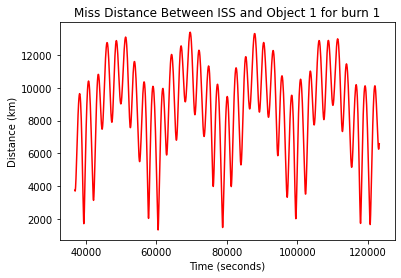

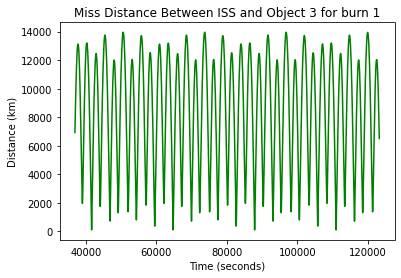

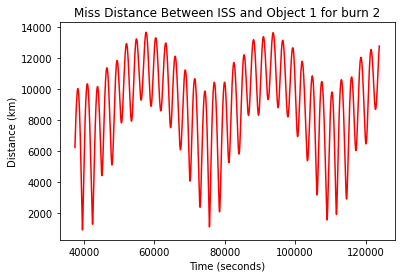

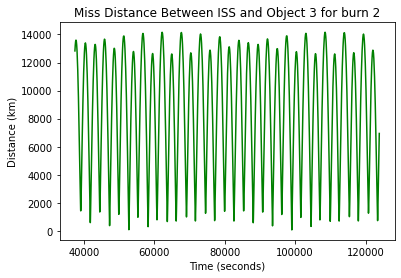

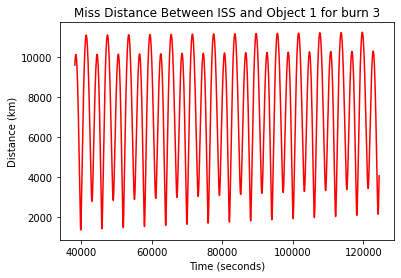

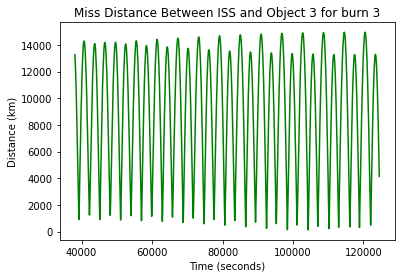

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


MU = 398600
# computing radius using 2nd order RK4 method

def mag(vec):
  return np.sqrt(np.dot(vec, vec))

# Lord forgive me for what I am to code

# Fehlberg coefficients
a = [0, 1/4, 3/8, 12/13, 1, 1/2]

b = [[0, 0, 0, 0, 0],
     [1/4, 0, 0, 0, 0],
     [3/32, 9/32, 0, 0, 0],
     [1932/2197, -7200/2197, 7296/2197, 0, 0],
     [439/216, -8, 3680/513, -845/4104, 0], [-8/27, 2, -3544/2565, 1859/4104, -11/40]]

c_star = [25/216, 0, 1408/2565, 2197/4104, -1/5, 0]

c = [16/135, 0, 6656/12825, 28561/56430, -9/50, 2/55]

# definitions of system of 1st order ODEs (2nd0 EQ of Motion split)

def f(state):
  r = [state[0][0], state[1][0], state[2][0]]
  r_mag = mag(r)
  return np.array([[state[3][0]],
                   [state[4][0]],
                   [state[5][0]],
                   [-MU/r_mag**3 * state[0][0]],
                   [-MU/r_mag**3 * state[1][0]],
                   [-MU/r_mag**3 * state[2][0]]])


# definition of f derivatives

def f_1(state):
  return f(state)

def f_2(state, h):
  state_inner = state + h * b[1][0] * f_1(state)
  return f(state_inner)

def f_3(state, h):
  state_inner = state + h * (b[2][0] * f_1(state) + b[2][1] * f_2(state, h))
  return f(state_inner)

def f_4(state, h):
  state_inner = state + h * (b[3][0] * f_1(state) + b[3][1] * f_2(state, h) + b[3][2] * f_3(state, h))
  return f(state_inner)

def f_5(state, h):
  state_inner = state + h * (b[4][0] * f_1(state) + b[4][1] * f_2(state, h) + b[4][2] * f_3(state, h) + b[4][3] * f_4(state, h))
  return f(state_inner)

def f_6(state, h):
  state_inner = state + h * (b[5][0] * f_1(state) + b[5][1] * f_2(state, h) + b[5][2] * f_3(state, h) + b[5][3] * f_4(state, h) + b[5][4] * f_5(state, h))
  return f(state_inner)

# update functions (for time and state)

def update_time(t, h):
  return t + h

def update_state(state, h):
  f_tot = c[0] * f_1(state) + c[1] * f_2(state, h) + c[2] * f_3(state, h) + c[3] * f_4(state, h) + c[4] * f_5(state, h) + c[5] * f_6(state, h)
  return state + h * f_tot

# finding delta r

def delta_r(state1, state2):
  r1 = np.array([state1[0][0], state1[1][0], state1[2][0]])
  r2 = np.array([state2[0][0], state2[1][0], state2[2][0]])

  return mag(r2 - r1)


# step size rule

def step_size_rule(delta_r):
  num = min(0.01 * (1.01)**(delta_r/10 - 1), 100)
  return max(num, 0.01)

### INITIAL STATES ###

iss_init_15 = np.array([[-1804.10143936],
            [6124.17648447],
            [2276.20952562],
            [-4.30385305 + 1],
            [-3.28610764],
            [5.43011113]])

o1_init_15 = np.array([[-5187.15181226],
                    [4604.28346644],
                    [2890.39403652],
                    [-4.20007638],
                    [-1.45119932],
                    [-5.53576132]])

o3_init_15 = np.array([[2484.65046744],
                    [5557.75267153],
                    [-3134.84808592],
                    [3.93597451],
                    [-4.36230341],
                    [-4.96596514]])

iss_init_25 = np.array([[-3792.63739875],
            [2942.77716076],
            [4785.11750289],
            [-2.06807792 + 1],
            [-6.90815702],
            [2.60926496]])

o1_init_25 = np.array([[-6700.43583441],
                    [3015.89651121],
                    [-724.46152494],
                    [-0.66677857],
                    [-3.70945993],
                    [-6.16941443]])

o3_init_25 = np.array([[4151.05498908],
                    [1947.68911171],
                    [-5237.32814108],
                    [1.43580321],
                    [-7.20719766],
                    [-1.81153418]])

iss_init_35 = np.array([[-4099.53425078],
            [-1543.43607694],
            [5172.32496411],
            [1.08467934 + 1],
            [-7.46716384],
            [-1.36852473]])

o1_init_35 = np.array([[-5885.74934172],
                    [389.80681242],
                    [-4072.21279249],
                    [3.35730235],
                    [-4.78692366],
                    [-4.61845365]])

o3_init_35 = np.array([[4115.65937177],
                    [-2477.2313819],
                    [-5192.67071665],
                    [-1.52585065],
                    [-7.03024336],
                    [1.92514342]])



### END INITIAL STATES ###

# function for Runge-Kutta method

def rkf5(init_state1, init_state2, t0, tf, object_num, burn_num):
  color_wheel = ['', 'red', 'blue', 'green', 'magenta', 'black']

  iss_states = []
  iss = init_state1

  debris_states = []
  debris = init_state2

  ts = []
  t = t0
  conjuncts = False

  drs = []


  while t < tf:
    t_i = t
    ts.append(t_i)

    iss_i = iss
    #iss_states.append(iss_i)

    debris_i = debris
    #debris_states.append(debris_i)


    dr = delta_r(iss_i, debris_i)
    drs.append(dr)


    if dr < 1 and not conjuncts:
      conjuncts = True
      print('This object conjuncts with the ISS at', t_i, 'seconds!')

    h = step_size_rule(dr)

    t = update_time(t_i, h)
    iss = update_state(iss_i, h)
    debris = update_state(debris_i, h)

  plt.plot(ts, drs, color=color_wheel[object_num])
  plt.title('Miss Distance Between ISS and Object '+str(object_num)+' for burn '+str(burn_num))
  plt.xlabel('Time (seconds)')
  plt.ylabel('Distance (km)')
  plt.show()


rkf5(iss_init_15, o1_init_15, 36900, 86400 + 36900, 1, 1)
rkf5(iss_init_15, o3_init_15, 36900, 86400 + 36900, 3, 1)

rkf5(iss_init_25, o1_init_25, 37500, 86400 + 37500, 1, 2)
rkf5(iss_init_25, o3_init_25, 37500, 86400 + 37500, 3, 2)

rkf5(iss_init_35, o1_init_35, 38100, 86400 + 38100, 1, 3)
rkf5(iss_init_35, o3_init_35, 38100, 86400 + 38100, 3, 3)